In [26]:
import numpy as np
import matplotlib.pyplot as plt

# PCA

PCA stands for "principal components analysis".

The "principal components" in PCA are the axes of covariation. Intuition: if you look at a pairplot, in what direction (if any) do you see the variables pointing?

The idea behind PCA is:
* find the components (the intrinsic axes of variation)
* order them from largest to smallest
* drop the smallest ones

This gives a data set with fewer variables, but that still has most of the information of the full dataset. Note that this type of projection does *not drop data variables*, instead it drops variation between data variables.



We can do this using matrix math!
* Rotate so the principal coordinates become coordinate axes (translation then rotation), then 
* drop the lesser ones, then 
* reverse the rotation and translation: $$A_{reconstruct} = (P@A_c^T)^T + \mu = A_c @ P^T + \mu$$
    
The rotation matrix is the *eigenvectors* of the covariance matrix. The eigenvectors tell us the direction of the principal components. The eigenvalues tell us the amount of variation in each principal coordinate direction.


Reminder: the eigenvectors are *orthonormal*. What does that mean?

So the steps to calculate PCA are:
* (If appropriate) normalize the variables to be in the range 0-1
* Center the data
* Compute the covariance matrix
* Compute the eigenvectors and eigenvalues; the eigenvectors tell us the direction of variance, and the eigenvalues tell us the amount of variance
* Get an ordering over the eigenvalues
* Sort the eigenvalues and eigenvectors accordingly
* Compute the proportional variance (how much bigger?) accounted for by each principal component
* Compute the cumulative sum of the proportional variance (tells us how many eigenvectors we need to explain a desired amount of variance)
* Examine the principal components. Select v' of them.
* Project the data into PCA space
* Reconstruct the data

In [27]:
# Let's do it on a small dataset so we can see what's going on

data = np.array([[1, 4.5],[2, 2.5], [3, 2.5], [4, 0.5]])
print(data)
columns = ['x,', 'y']

[[1.  4.5]
 [2.  2.5]
 [3.  2.5]
 [4.  0.5]]


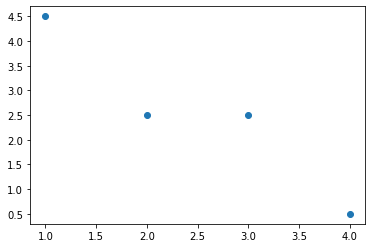

In [29]:
# Let's plot the data

plt.scatter(x = data[:, 0], y=data[:, 1])
plt.show()

# In which directions do the points vary?

[[-1.5  2. ]
 [-0.5  0. ]
 [ 0.5  0. ]
 [ 1.5 -2. ]]


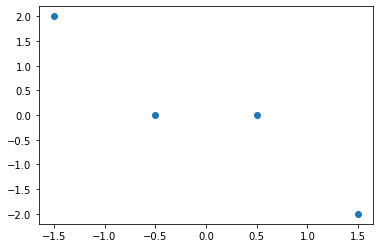

In [30]:
# Center the data

centered_data = data - np.mean(data, axis=0)
print(centered_data)
plt.scatter(x = centered_data[:, 0], y=centered_data[:, 1])
plt.show()

In [31]:
# Compute the covariance matrix

covariance_matrix = (centered_data.T @ centered_data) / (data.shape[0] - 1)
print(covariance_matrix)

[[ 1.66666667 -2.        ]
 [-2.          2.66666667]]


In [32]:
# Compute the eigenvalues and eigenvectors

(evals, evectors) = np.linalg.eig(covariance_matrix)
print(evals)
print(evectors)

[0.10511385 4.22821948]
[[-0.78820544  0.61541221]
 [-0.61541221 -0.78820544]]


In [33]:
# Get an ordering over the eigenvalues

evals_order = np.argsort(evals)[::-1]
print(evals_order)

[1 0]


In [34]:
# Sort the eigenvalues and eigenvectors accordingly

evals_sorted = evals[evals_order]
for e in evals_sorted:
    print(e)

evectors_sorted = evectors[:, evals_order]

4.228219479475497
0.10511385385783623


In [35]:
# Compute the proportional variance

evals_sum = np.sum(evals_sorted)
ps = [eval / evals_sum for eval in evals_sorted]
print(ps)

[0.9757429568020378, 0.024257043197962208]


In [36]:
# Compute the cumulative sum of the proportional variance

c = 0
for i in range(len(ps)):
    c = c + ps[i]
    print(i, ps[i], c)

0 0.9757429568020378 0.9757429568020378
1 0.024257043197962208 1.0


In [46]:
# Examine the principal components

print(evectors_sorted)

[[ 0.61541221 -0.78820544]
 [-0.78820544 -0.61541221]]


In [47]:
# Construct v'

v = np.array([evectors_sorted[:, 0]]).T
print(v)

[[ 0.61541221]
 [-0.78820544]]


In [50]:
# Project the data into PCA space

projected_data = centered_data@v
print(projected_data)

[[-2.49952919]
 [-0.3077061 ]
 [ 0.3077061 ]
 [ 2.49952919]]


[[0.96175922 4.4701425 ]
 [2.31063391 2.74253563]
 [2.68936609 2.25746437]
 [4.03824078 0.5298575 ]]


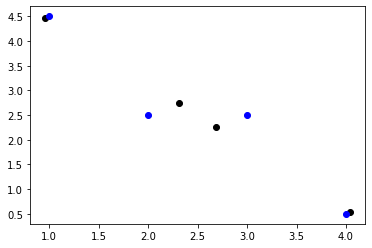

In [56]:
# Reconstruct the data with only the chosen principal components

reconstructed_data = projected_data@v.T + np.mean(data, axis=0)
print(reconstructed_data)
plt.scatter(x = reconstructed_data[:, 0], y=reconstructed_data[:, 1], color="black")
plt.scatter(x = data[:, 0], y=data[:, 1], color="blue")
plt.show()

If we do all this, then:
* what does the data look like in "PC space"?
* what does it look like projected back?
* how does a regression fit on the PC transformed data compare with one fit on the original data?

In [ ]:
# Now let's do it on our big dataset!

Resources:
* https://plotly.com/python/pca-visualization/
* https://wendynavarrete.com/principal-component-analysis-with-numpy/
* https://dev.to/akaame/implementing-simple-pca-using-numpy-3k0a